### 필요 라이브러리 설치

In [ ]:
!pip install portalocker

In [ ]:
!pip install torch --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━

#### PyTorch 라이브러리를 사용하여 RNN 레이어를 만들고, 이 레이어의 가중치와 편향을 초기화하고, 그 모양(shape)을 출력

In [ ]:
# 필요한 torch 모듈을 가져옵니다.
import torch
import torch.nn as nn

# 재현 가능한 결과를 위해 난수 생성기의 시드를 설정합니다.
torch.manual_seed(1)

# RNN 레이어를 생성합니다. 입력 특성의 수는 5, 숨겨진 레이어의 크기는 2,
# 레이어 수는 1이며, 배치의 첫 번째 차원이 오도록 설정합니다(batch_first=True).
rnn_layer = nn.RNN(input_size=5, hidden_size=2, num_layers=1, batch_first=True)

# 가중치와 편향을 RNN 레이어에서 가져옵니다.
w_xh = rnn_layer.weight_ih_l0  # 입력 x에서 숨겨진 h로의 가중치
w_hh = rnn_layer.weight_hh_l0  # 숨겨진 h에서 다음 숨겨진 h로의 가중치
b_xh = rnn_layer.bias_ih_l0    # 입력 x에서 숨겨진 h로의 편향
b_hh = rnn_layer.bias_hh_l0    # 숨겨진 h에서 다음 숨겨진 h로의 편향

# 가중치와 편향의 모양(크기)를 출력합니다.
print('W_xh shape:', w_xh.shape)  # 입력에서 숨겨진 상태로의 가중치 모양
print('W_hh shape:', w_hh.shape)  # 숨겨진 상태에서 숨겨진 상태로의 가중치 모양
print('b_xh shape:', b_xh.shape)  # 입력에서 숨겨진 상태로의 편향 모양
print('b_hh shape:', b_hh.shape)  # 숨겨진 상태에서 숨겨진 상태로의 편향 모양

W_xh shape: torch.Size([2, 5])
W_hh shape: torch.Size([2, 2])
b_xh shape: torch.Size([2])
b_hh shape: torch.Size([2])


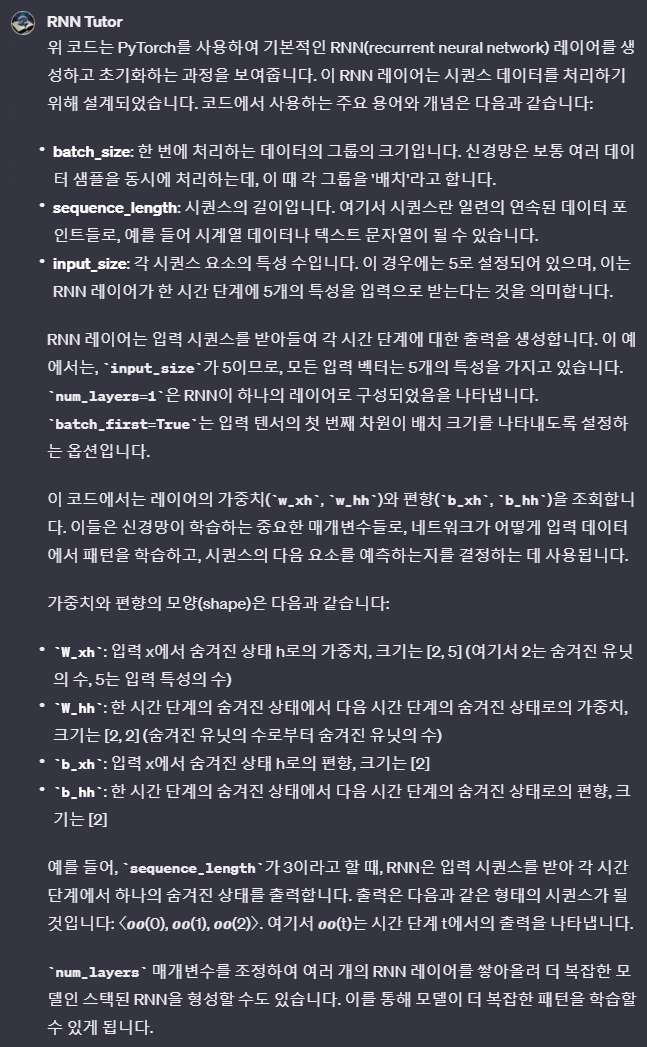

#### RNN 레이어에 대한 순전파를 수행하고, 각 시간 단계에서의 출력을 수동으로 계산하여 RNN 레이어의 출력과 비교하는 과정

In [ ]:
import torch

# 테스트 시퀀스를 생성합니다. 각 시퀀스는 길이가 5이고, 각 원소는 1.0, 2.0, 3.0 입니다.
x_seq = torch.tensor([[1.0]*5, [2.0]*5, [3.0]*5]).float()

# 간단한 RNN을 통해 출력을 계산합니다.
output, hn = rnn_layer(torch.reshape(x_seq, (1, 3, 5)))

# 출력을 수동으로 계산합니다.
out_man = []

# 각 시간 단계에 대해 반복합니다.
for t in range(3):
    # 현재 시간 단계의 입력 데이터를 가져옵니다.
    xt = torch.reshape(x_seq[t], (1, 5))
    print(f'Time step {t} =>')
    print(' Input :', xt.numpy())

    # 숨겨진 상태를 계산합니다. 입력과 가중치를 곱하고 편향을 더합니다.
    ht = torch.matmul(xt, torch.transpose(w_xh, 0, 1)) + b_hh
    print(' Hidden :', ht.detach().numpy())

    # 이전 숨겨진 상태를 사용하여 출력을 계산합니다.
    if t > 0:
        prev_h = out_man[t-1]
    else:
        prev_h = torch.zeros((ht.shape))
    ot = ht + torch.matmul(prev_h, torch.transpose(w_hh, 0, 1)) + b_hh
    ot = torch.tanh(ot)
    out_man.append(ot)

    # 수동으로 계산한 출력과 RNN 레이어의 출력을 비교합니다.
    print(' Output (manual) :', ot.detach().numpy())
    print(' RNN output :', output[:, t].detach().numpy())
    print()

Time step 0 =>
 Input : [[1. 1. 1. 1. 1.]]
 Hidden : [[-0.3161478  0.6472246]]
 Output (manual) : [[-0.21046415  0.5678879 ]]
 RNN output : [[-0.35198015  0.52525216]]

Time step 1 =>
 Input : [[2. 2. 2. 2. 2.]]
 Hidden : [[-0.73478645  1.297274  ]]
 Output (manual) : [[-0.5741978  0.7945334]]
 RNN output : [[-0.68424344  0.76074266]]

Time step 2 =>
 Input : [[3. 3. 3. 3. 3.]]
 Hidden : [[-1.153425   1.9473233]]
 Output (manual) : [[-0.8130059  0.918174 ]]
 RNN output : [[-0.8649416   0.90466356]]



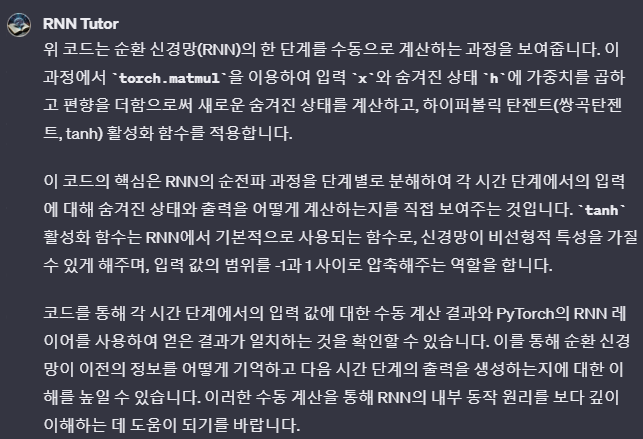

#### 출력 결과

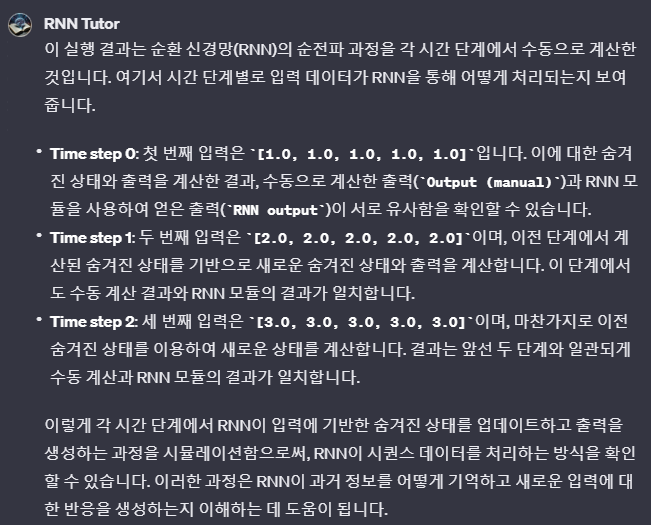

### PPT 11페이지로

### 영화 리뷰 데이터 준비

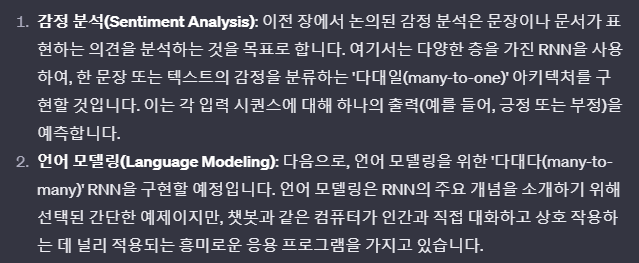

영화 리뷰 데이터 준비하기

Chapter 8에서 우리는 리뷰 데이터셋을 전처리하고 정리했습니다. 이제 같은 과정을 수행할 것입니다.

먼저 필요한 모듈들을 import하고 torchtext에서 데이터를 읽어오겠습니다.

각 데이터셋은 25,000개의 샘플을 포함하고 있습니다.

각 샘플은 두 요소로 구성되어 있습니다:

하나는 예측하고자 하는 대상 레이블인 감정 레이블('neg'는 부정적 감정, 'pos'는 긍정적 감정을 의미)이고,

다른 하나는 입력 특징인 영화 리뷰 텍스트입니다.

이 영화 리뷰의 텍스트 구성요소는 단어 시퀀스이며, RNN 모델은 각 시퀀스를 긍정(1) 또는 부정(0) 리뷰로 분류합니다.

In [ ]:
#!pip install portalocker

In [ ]:
# torchtext를 통해 IMDB 영화 리뷰 데이터셋을 불러오기
from torchtext.datasets import IMDB

# 훈련 데이터셋 로드
train_dataset = IMDB(split='train')
# 테스트 데이터셋 로드
test_dataset = IMDB(split='test')

test_dataset = list(test_dataset)

### 데이터 전처리

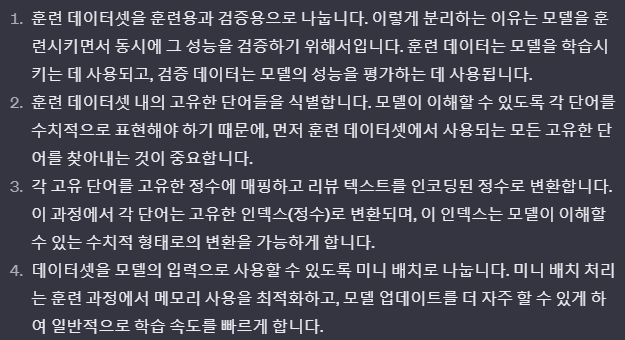

#### 1. 데이터 분할

In [ ]:
#!pip install torch --upgrade

In [ ]:
# 필요한 라이브러리를 불러옵니다
from torch.utils.data.dataset import random_split

# 동일한 결과를 얻기 위해 랜덤 시드를 설정합니다
torch.manual_seed(1)

# train_dataset을 훈련 세트와 검증 세트로 분할합니다
# 여기서 훈련 세트는 20,000개의 샘플을, 검증 세트는 5,000개의 샘플을 포함하도록 설정합니다
train_dataset, valid_dataset = random_split(
    list(train_dataset), [20000, 5000])

### 2. 고유 토큰(단어) 수집

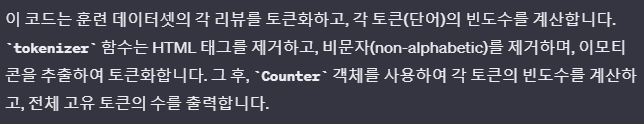

In [ ]:
# 고유 토큰(단어) 찾기
import re
from collections import Counter, OrderedDict

# 텍스트를 토큰화하는 함수 정의
# HTML 태그 제거, 이모티콘 추출, 비문자(non-alphabetic) 제거 등을 수행
# Counter 객체를 생성하여 토큰 빈도수 계산
token_counts = Counter()

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)  # HTML 태그 제거
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())  # 이모티콘 추출
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')  # 비문자 제거 및 이모티콘 추가
    tokenized = text.split()  # 공백 기준으로 분리하여 토큰화
    return tokenized

for label, line in train_dataset:
    tokens = tokenizer(line)  # 각 리뷰를 토큰화
    token_counts.update(tokens)  # 토큰 빈도수 업데이트

# 고유 토큰의 개수 출력
print('Vocab-size:', len(token_counts))

Vocab-size: 69023


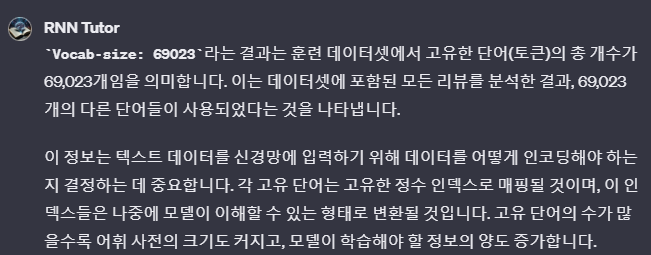

#### 3. 고유 토큰(단어)를 정수로 인코딩

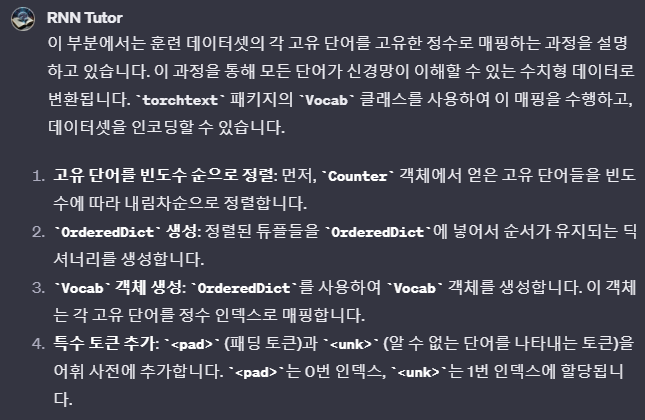

In [ ]:
# 고유 토큰을 정수로 인코딩하기
from torchtext.vocab import vocab
from collections import OrderedDict

# 토큰과 빈도수를 내림차순으로 정렬
sorted_by_freq_tuples = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

# 정렬된 토큰으로 OrderedDict 생성
ordered_dict = OrderedDict(sorted_by_freq_tuples)

# OrderedDict를 사용하여 Vocab 객체 생성
vocab = vocab(ordered_dict)

# 특수 토큰 <pad>와 <unk> 추가
vocab.insert_token("<pad>", 0)
vocab.insert_token("<unk>", 1)

# <unk>를 기본 인덱스로 설정 (알 수 없는 단어 처리)
vocab.set_default_index(1)

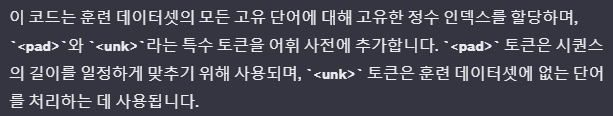

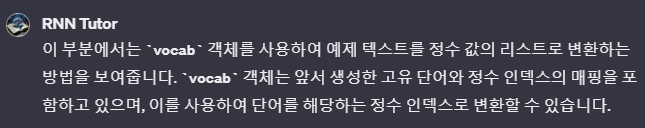

In [ ]:
# vocab 객체 사용 예시
# 주어진 단어 리스트를 정수 인덱스 리스트로 변환
print([vocab[token] for token in ['this', 'is', 'an', 'example']])

[11, 7, 35, 457]


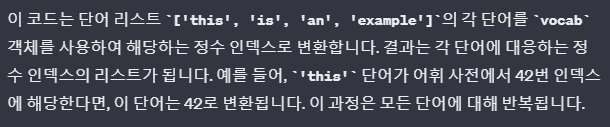

#### 3. 고유 토큰(단어)를 정수로 인코딩 정리

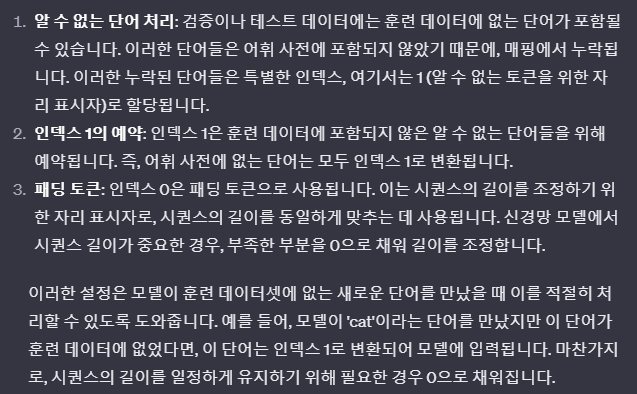

#### 3-A. transformation 함수 정의

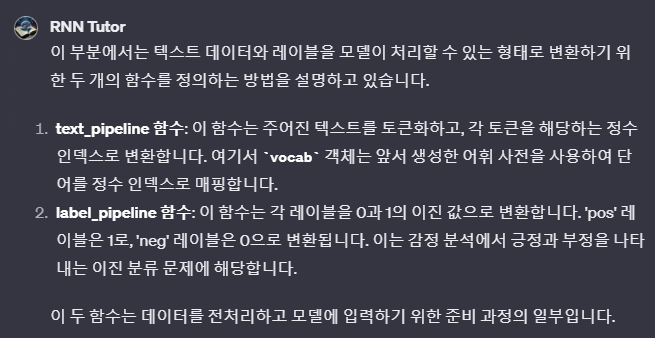

In [ ]:
if not torch.cuda.is_available():
    print("Warning: this code may be very slow on CPU")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# 데이터 변환을 위한 함수 정의
# 텍스트를 정수 인덱스의 시퀀스로 변환하는 함수
text_pipeline = lambda x: [vocab[token] for token in tokenizer(x)]

# 레이블을 이진 값으로 변환하는 함수
# 'pos' 레이블은 1.0으로, 그 외(즉 'neg')는 0.0으로 변환
from torchtext import __version__ as torchtext_version
from pkg_resources import parse_version

if parse_version(torchtext_version) > parse_version("0.10"):
    label_pipeline = lambda x: 1. if x == 2 else 0.         # 1 ~ negative, 2 ~ positive review
else:
    label_pipeline = lambda x: 1. if x == 'pos' else 0.

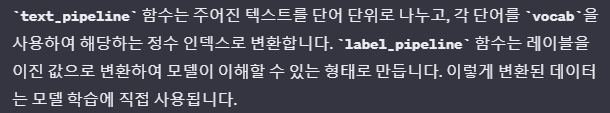

#### 3-B. 텍스트 인코딩 및 레이블 변환을 위한 함수

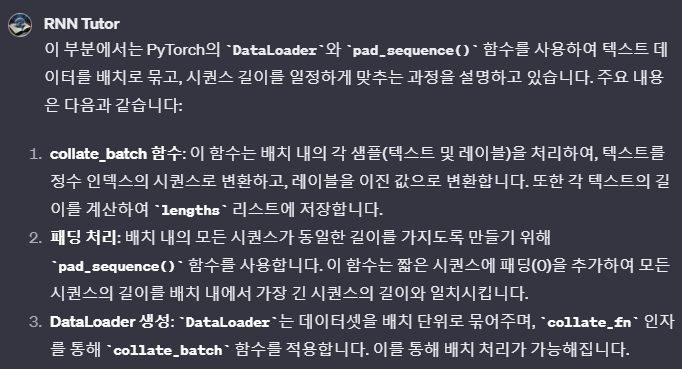

In [ ]:
# 텍스트 인코딩 및 레이블 변환을 위한 함수를 collate_batch 함수로 래핑
def collate_batch(batch):
    label_list, text_list, lengths = [], [], []
    for _label, _text in batch:
        label_list.append(label_pipeline(_label))  # 레이블 변환
        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)  # 텍스트 인코딩
        text_list.append(processed_text)  # 인코딩된 텍스트 추가
        lengths.append(processed_text.size(0))  # 텍스트 길이 계산

    label_list = torch.tensor(label_list)
    lengths = torch.tensor(lengths)
    padded_text_list = nn.utils.rnn.pad_sequence(text_list, batch_first=True)  # 시퀀스 길이 일치시키기
    return padded_text_list.to(device), label_list.to(device), lengths.to(device)

# DataLoader 생성
from torch.utils.data import DataLoader
dataloader = DataLoader(train_dataset, batch_size=4, shuffle=False, collate_fn=collate_batch)

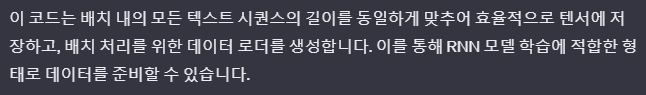

#### pad_sequence()

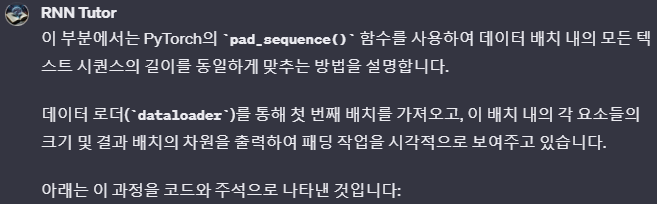

In [ ]:
# DataLoader에서 첫 번째 배치를 가져옵니다
text_batch, label_batch, length_batch = next(iter(dataloader))

# 텍스트 배치의 내용을 출력합니다
print(text_batch)
# 레이블 배치의 내용을 출력합니다
print(label_batch)
# 각 텍스트의 길이를 나타내는 배치를 출력합니다
print(length_batch)
# 텍스트 배치의 형태를 출력합니다
print(text_batch.shape)

tensor([[   35,  1739,     7,   449,   721,     6,   301,     4,   787,     9,
             4,    18,    44,     2,  1705,  2460,   186,    25,     7,    24,
           100,  1874,  1739,    25,     7, 34415,  3568,  1103,  7517,   787,
             5,     2,  4991, 12401,    36,     7,   148,   111,   939,     6,
         11598,     2,   172,   135,    62,    25,  3199,  1602,     3,   928,
          1500,     9,     6,  4601,     2,   155,    36,    14,   274,     4,
         42945,     9,  4991,     3,    14, 10296,    34,  3568,     8,    51,
           148,    30,     2,    58,    16,    11,  1893,   125,     6,   420,
          1214,    27, 14542,   940,    11,     7,    29,   951,    18,    17,
         15994,   459,    34,  2480, 15211,  3713,     2,   840,  3200,     9,
          3568,    13,   107,     9,   175,    94,    25,    51, 10297,  1796,
            27,   712,    16,     2,   220,    17,     4,    54,   722,   238,
           395,     2,   787,    32,    27,  5236,  

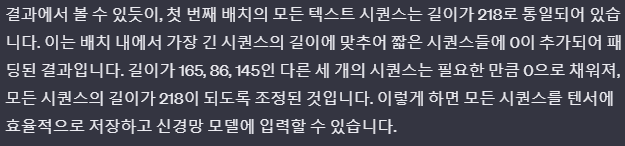

#### 배치 데이터로더

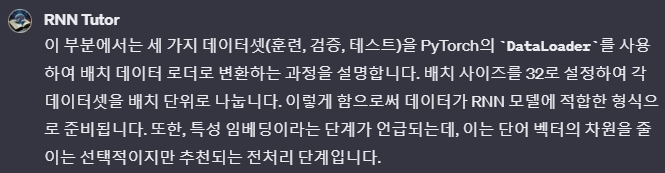


In [ ]:
# 배치 크기를 설정합니다
batch_size = 32

# 훈련 데이터셋을 DataLoader로 변환합니다
# 배치 크기를 설정하고, 데이터를 섞어서 (shuffle) 제공하며, collate_batch 함수를 적용합니다
train_dl = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_batch)

# 검증 데이터셋을 DataLoader로 변환합니다
# 데이터를 섞지 않고 (shuffle=False) 제공합니다
valid_dl = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_batch)

# 테스트 데이터셋을 DataLoader로 변환합니다
# 데이터를 섞지 않고 제공합니다
test_dl = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_batch)

# 이제 데이터가 RNN 모델 학습에 적합한 형태로 준비되었습니다
# 다음 절에서는 특성 임베딩에 대해 논의할 것입니다

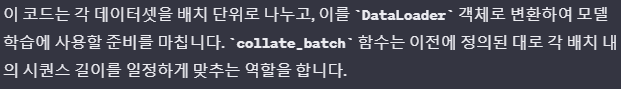

#### 문장 인코딩을 위한 임베딩 층 (PPT 15 페이지)

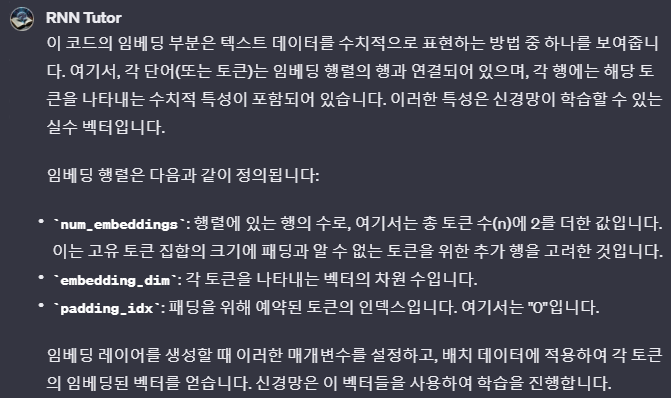

In [ ]:
# 임베딩 레이어 생성
embedding = nn.Embedding(num_embeddings=10, embedding_dim=3, padding_idx=0)

# 인코딩된 텍스트의 배치 (각 샘플은 4개의 인덱스를 가짐)
text_encoded_input = torch.LongTensor([[1,2,4,5],[4,3,2,0]])

# 임베딩된 결과 출력
print(embedding(text_encoded_input))

tensor([[[ 0.7039, -0.8321, -0.4651],
         [-0.3203,  2.2408,  0.5566],
         [-0.4643,  0.3046,  0.7046],
         [-0.7106, -0.2959,  0.8356]],

        [[-0.4643,  0.3046,  0.7046],
         [ 0.0946, -0.3531,  0.9124],
         [-0.3203,  2.2408,  0.5566],
         [ 0.0000,  0.0000,  0.0000]]], grad_fn=<EmbeddingBackward0>)


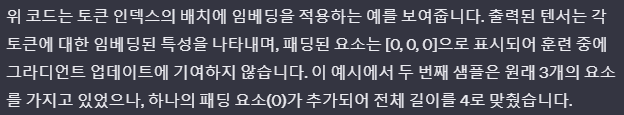

#### RNN 구축

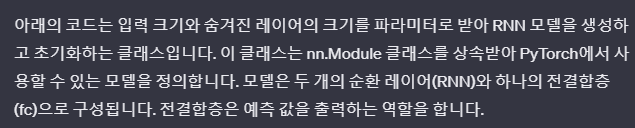

In [ ]:
# RNN 모델 클래스 정의
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        # RNN 레이어 생성, 두 개의 순환 레이어를 갖도록 설정
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=2, batch_first=True)
        # 출력을 위한 전결합층 추가
        self.fc = nn.Linear(hidden_size, 1)

    # 순전파 함수 정의
    def forward(self, x):
        # x를 RNN에 통과시키고 마지막 숨겨진 상태를 받아옴
        _, hidden = self.rnn(x)
        # 마지막 숨겨진 상태를 전결합층에 통과시켜 결과값을 얻음
        out = self.fc(hidden[-1, :, :])
        return out

# 입력 크기가 64, 숨겨진 레이어 크기가 32인 RNN 모델 인스턴스 생성
model = RNN(64, 32)
print(model)

# 무작위 데이터를 모델에 통과시키고 결과를 출력
output = model(torch.randn(5, 3, 64))
print(output)

RNN(
  (rnn): RNN(64, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
tensor([[ 0.3183],
        [ 0.1230],
        [ 0.1772],
        [-0.1052],
        [-0.1259]], grad_fn=<AddmmBackward0>)


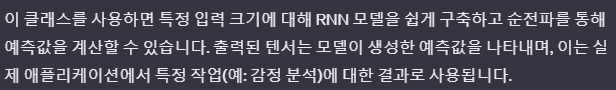

#### 감정 분석을 위한 RNN 구축

In [ ]:
# RNN 모델 클래스 정의
class RNN(nn.Module):
    # 생성자에서 모델의 레이어들을 초기화
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size):
        super().__init__()
        # 단어를 벡터로 변환하는 임베딩 레이어
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        # LSTM 레이어
        self.rnn = nn.LSTM(embed_dim, rnn_hidden_size, batch_first=True)
        # 완전 연결 레이어들
        self.fc1 = nn.Linear(rnn_hidden_size, fc_hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    # 순전파 함수
    def forward(self, text, lengths):
        # 텍스트를 임베딩 벡터로 변환
        out = self.embedding(text)
        # 패딩된 시퀀스를 패킹
        out = nn.utils.rnn.pack_padded_sequence(out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True)
        # LSTM을 통과
        out, (hidden, cell) = self.rnn(out)
        # 마지막 숨겨진 상태를 사용
        out = hidden[-1, :, :]
        # 완전 연결 레이어들을 통과
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        # 시그모이드 함수를 통해 확률 값을 얻음
        out = self.sigmoid(out)
        return out

# 모델 초기화
vocab_size = len(vocab) # 어휘 사전의 크기
embed_dim = 20 # 임베딩 차원
rnn_hidden_size = 64 # LSTM 숨겨진 상태의 크기
fc_hidden_size = 64 # 완전 연결 레이어의 크기

# 모델 인스턴스 생성
torch.manual_seed(1)
model = RNN(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size)
model = model.to(device)
print(model)

RNN(
  (embedding): Embedding(69025, 20, padding_idx=0)
  (rnn): LSTM(20, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [ ]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size,
                                      embed_dim,
                                      padding_idx=0)
        self.rnn = nn.LSTM(embed_dim, rnn_hidden_size,
                           batch_first=True)
        self.fc1 = nn.Linear(rnn_hidden_size, fc_hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, text, lengths):
        out = self.embedding(text)
        out = nn.utils.rnn.pack_padded_sequence(out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True)
        out, (hidden, cell) = self.rnn(out)
        out = hidden[-1, :, :]
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

vocab_size = len(vocab)
embed_dim = 20
rnn_hidden_size = 64
fc_hidden_size = 64

torch.manual_seed(1)
model = RNN(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size)
model = model.to(device)

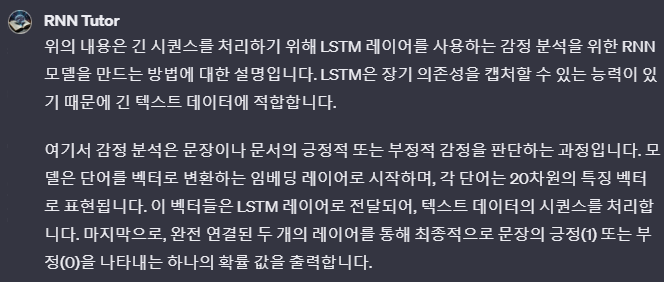

#### 데이터셋을 training 하고 분류 정확도와 손실을 반환하는 함수

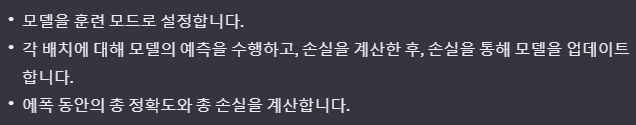

In [ ]:
# 훈련 함수 정의
def train(dataloader):
    model.train()  # 모델을 훈련 모드로 설정
    total_acc, total_loss = 0, 0  # 정확도와 손실을 추적하기 위한 변수 초기화

    # 데이터 로더에서 배치를 반복하여 가져옴
    for text_batch, label_batch, lengths in dataloader:
        optimizer.zero_grad()  # 이전 배치의 그래디언트를 초기화
        pred = model(text_batch, lengths)[:, 0]  # 현재 배치에 대한 예측 수행
        loss = loss_fn(pred, label_batch)  # 손실 계산
        loss.backward()  # 손실에 대한 그래디언트 계산
        optimizer.step()  # 모델의 파라미터 업데이트

        # 정확도 계산: 예측이 실제 레이블과 일치하는지 확인
        total_acc += ((pred >= 0.5).float() == label_batch).float().sum().item()
        total_loss += loss.item() * label_batch.size(0)  # 총 손실 업데이트

    # 전체 데이터셋에 대한 평균 정확도와 손실을 반환
    return total_acc / len(dataloader.dataset), total_loss / len(dataloader.dataset)

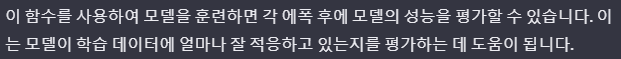

#### 평가 함수

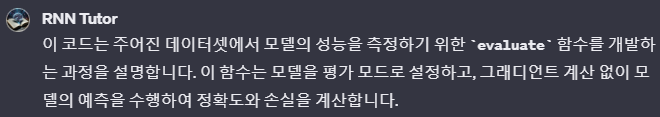

In [ ]:
# 평가 함수 정의
def evaluate(dataloader):
    model.eval()  # 모델을 평가 모드로 설정
    total_acc, total_loss = 0, 0  # 정확도와 손실을 추적하기 위한 변수 초기화

    # 그래디언트 계산을 방지하기 위해 no_grad 컨텍스트를 사용
    with torch.no_grad():
        # 데이터 로더에서 배치를 반복하여 가져옴
        for text_batch, label_batch, lengths in dataloader:
            pred = model(text_batch, lengths)[:, 0]  # 현재 배치에 대한 예측 수행
            loss = loss_fn(pred, label_batch)  # 손실 계산

            # 정확도 계산: 예측이 실제 레이블과 일치하는지 확인
            total_acc += ((pred >= 0.5).float() == label_batch).float().sum().item()
            total_loss += loss.item() * label_batch.size(0)  # 총 손실 업데이트

    # 전체 데이터셋에 대한 평균 정확도와 손실을 반환
    return total_acc / len(dataloader.dataset), total_loss / len(dataloader.dataset)

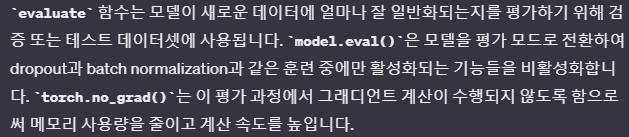

#### 손실함수와 옵티마이저

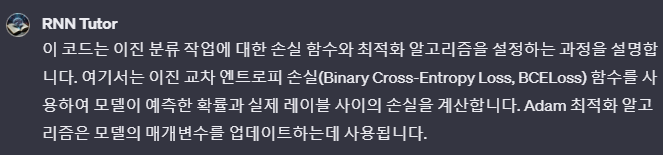

In [ ]:
# 이진 분류 손실 함수 생성
loss_fn = nn.BCELoss()

# Adam 최적화 알고리즘을 사용하여 모델의 매개변수를 최적화
# lr은 학습률(learning rate)을 의미하며, 이 값에 따라 매개변수 업데이트의 크기가 결정됩니다.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

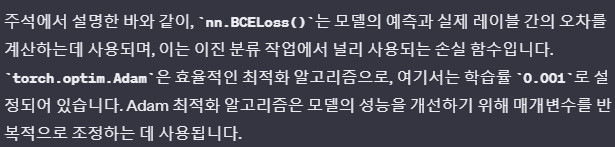

#### 10 epochs 학습

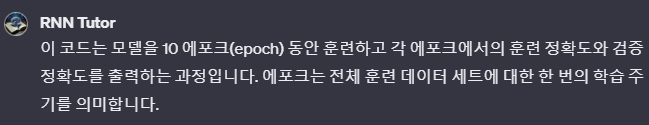

In [ ]:
# 훈련할 에포크 수를 설정합니다.
num_epochs = 10

# 동일한 결과를 얻기 위해 랜덤 시드를 설정합니다.
torch.manual_seed(1)

# 각 에포크마다 반복합니다.
for epoch in range(num_epochs):
    # 훈련 데이터 로더를 사용하여 모델을 훈련하고 훈련 정확도와 손실을 계산합니다.
    acc_train, loss_train = train(train_dl)

    # 검증 데이터 로더를 사용하여 모델을 평가하고 검증 정확도와 손실을 계산합니다.
    acc_valid, loss_valid = evaluate(valid_dl)

    # 현재 에포크의 훈련 및 검증 정확도를 출력합니다.
    print(f'Epoch {epoch} accuracy: {acc_train:.4f} val_accuracy: {acc_valid:.4f}')

Epoch 0 accuracy: 0.5970 val_accuracy: 0.6390
Epoch 1 accuracy: 0.7216 val_accuracy: 0.7492
Epoch 2 accuracy: 0.7900 val_accuracy: 0.6022
Epoch 3 accuracy: 0.8105 val_accuracy: 0.8072
Epoch 4 accuracy: 0.8395 val_accuracy: 0.7892
Epoch 5 accuracy: 0.8737 val_accuracy: 0.7830
Epoch 6 accuracy: 0.9099 val_accuracy: 0.8058
Epoch 7 accuracy: 0.9246 val_accuracy: 0.8482
Epoch 8 accuracy: 0.9393 val_accuracy: 0.8594
Epoch 9 accuracy: 0.9480 val_accuracy: 0.8562


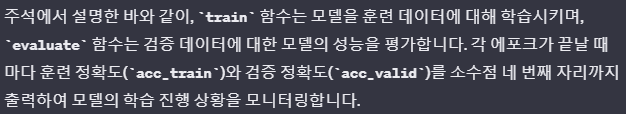

#### 성능 평가

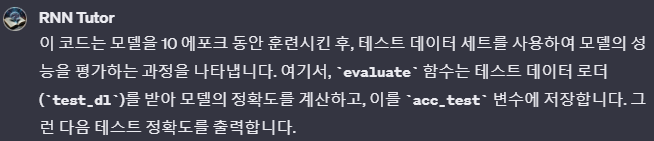

In [ ]:
# 테스트 데이터 로더를 사용하여 모델의 성능을 평가합니다.
# evaluate 함수는 정확도와 손실 두 가지 값을 반환하지만, 여기서는 정확도만 필요로 합니다.
acc_test, _ = evaluate(test_dl)

# 테스트 데이터에 대한 모델의 정확도를 출력합니다.
# 출력 형식은 소수점 네 번째 자리까지의 정확도를 보여줍니다.
print(f'test_accuracy: {acc_test:.4f}')

test_accuracy: 0.8498


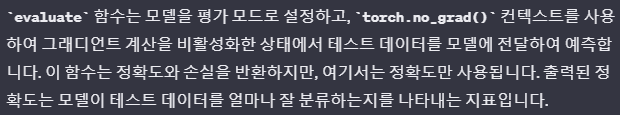

#### bidirectional RNN

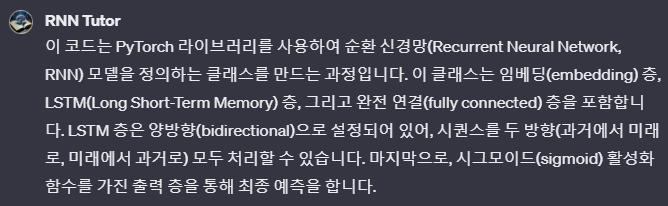

In [ ]:
# RNN 모델을 정의하는 클래스입니다.
class RNN(nn.Module):
    # 클래스의 초기화 메소드입니다.
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size):
        super().__init__()
        # 임베딩 층을 정의합니다. 각 단어는 embed_dim 차원의 벡터로 표현됩니다.
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)

        # 양방향 LSTM 층을 정의합니다.
        self.rnn = nn.LSTM(embed_dim, rnn_hidden_size, batch_first=True, bidirectional=True)

        # 완전 연결 층을 정의합니다.
        self.fc1 = nn.Linear(rnn_hidden_size * 2, fc_hidden_size) # 양방향이므로 *2를 해줍니다.
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    # 모델이 입력 데이터를 어떻게 처리할지를 정의합니다.
    def forward(self, text, lengths):
        # 임베딩 층을 통과시켜 임베딩 벡터를 얻습니다.
        out = self.embedding(text)

        # 패딩된 시퀀스를 처리하기 위해 pack_padded_sequence를 사용합니다.
        out = nn.utils.rnn.pack_padded_sequence(out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True)

        # LSTM 층을 통과시킵니다.
        _, (hidden, cell) = self.rnn(out)

        # 양방향 LSTM의 마지막 은닉 상태를 연결합니다.
        out = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)

        # 완전 연결 층을 통과시킵니다.
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)

        # 시그모이드 함수를 통해 최종 출력을 0과 1 사이의 값으로 변환합니다.
        out = self.sigmoid(out)

        # 최종 출력을 반환합니다.
        return out

# 모델을 초기화합니다. 여기서는 임베딩 차원, LSTM의 은닉 상태 크기 등을 설정합니다.
torch.manual_seed(1)
model = RNN(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size)
model = model.to(device)
# 모델 구조를 출력합니다.
model

RNN(
  (embedding): Embedding(69025, 20, padding_idx=0)
  (rnn): LSTM(20, 64, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)

num_epochs = 10

torch.manual_seed(1)

for epoch in range(num_epochs):
    acc_train, loss_train = train(train_dl)
    acc_valid, loss_valid = evaluate(valid_dl)
    print(f'Epoch {epoch} accuracy: {acc_train:.4f} val_accuracy: {acc_valid:.4f}')

Epoch 0 accuracy: 0.6339 val_accuracy: 0.7398
Epoch 1 accuracy: 0.7985 val_accuracy: 0.8150
Epoch 2 accuracy: 0.8616 val_accuracy: 0.8452
Epoch 3 accuracy: 0.8971 val_accuracy: 0.8560
Epoch 4 accuracy: 0.9327 val_accuracy: 0.8572
Epoch 5 accuracy: 0.9578 val_accuracy: 0.8444
Epoch 6 accuracy: 0.9701 val_accuracy: 0.8446
Epoch 7 accuracy: 0.9836 val_accuracy: 0.8608
Epoch 8 accuracy: 0.9880 val_accuracy: 0.8674
Epoch 9 accuracy: 0.9941 val_accuracy: 0.8602


In [ ]:
acc_test, _ = evaluate(test_dl)
print(f'test_accuracy: {acc_test:.4f}')

test_accuracy: 0.8476


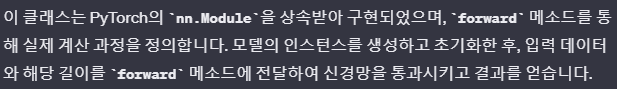

### Project two - 문자 수준의 언어 모델링 (PPT 16페이지)

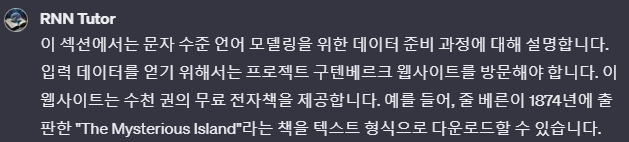

#### 데이터 다운로드

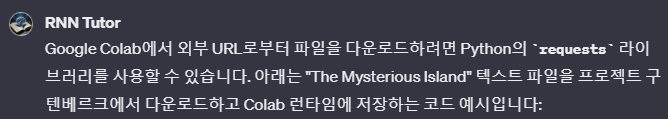

In [ ]:
import requests

# 파일의 URL
url = 'https://www.gutenberg.org/files/1268/1268-0.txt'

# GET 요청을 통해 파일 다운로드
response = requests.get(url)

# 응답이 성공적인지 확인
if response.status_code == 200:
    # 텍스트 데이터를 'mysterious_island.txt' 파일로 저장
    with open('/content/mysterious_island.txt', 'w', encoding='utf-8') as f:
        f.write(response.text)
else:
    print('Failed to retrieve the document')

# 다운로드한 파일의 경로를 출력
print('Downloaded "The Mysterious Island" to /content/mysterious_island.txt')

Downloaded "The Mysterious Island" to /content/mysterious_island.txt


#### 받은 데이터 파일 전처리
##### 파일 경로 책과 다름

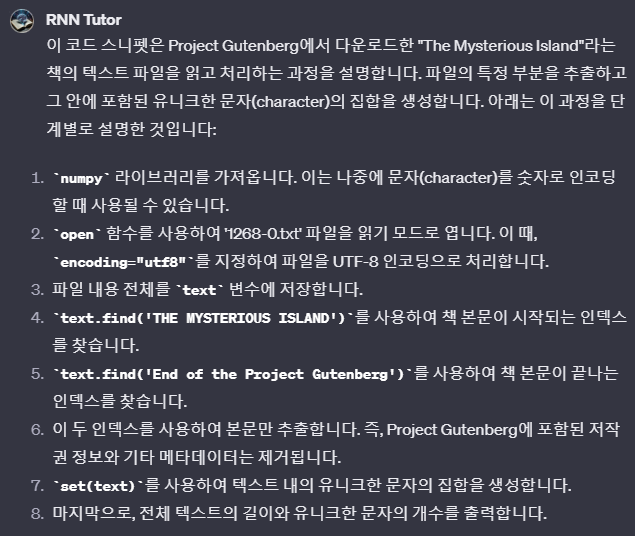

In [ ]:
import numpy as np

# 수정된 파일 경로를 사용하여 'mysterious_island.txt' 파일을 읽어서 'text' 변수에 저장합니다.
with open('/content/mysterious_island.txt', 'r', encoding="utf8") as fp:
    text = fp.read()

# 책 본문이 시작하는 위치를 찾습니다.
start_indx = text.find('THE MYSTERIOUS ISLAND')

# 책 본문이 끝나는 위치를 찾습니다.
end_indx = text.find('End of the Project Gutenberg')

# 시작 인덱스와 끝 인덱스를 사용하여 책 본문만 추출합니다.
text = text[start_indx:end_indx]

# 추출된 텍스트에서 유니크한 문자들의 집합을 생성합니다.
char_set = set(text)

# 전체 텍스트의 길이와 유니크한 문자의 개수를 출력합니다.
print('Total Length:', len(text))
print('Unique Characters:', len(char_set))

Total Length: 1147033
Unique Characters: 87


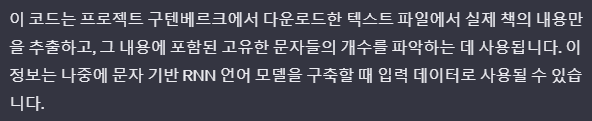

#### 텍스트 -> 정수 매핑 (PPT 17페이지)

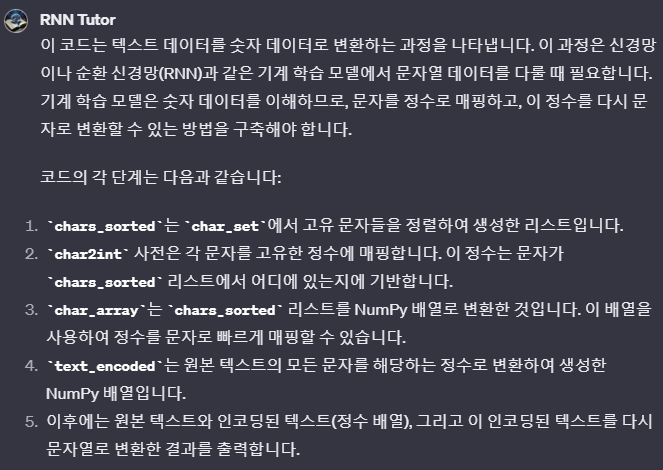

In [ ]:
import numpy as np

# 문자를 정렬하여 리스트를 만듭니다.
chars_sorted = sorted(char_set)

# 각 문자를 고유한 정수에 매핑하는 사전을 생성합니다.
char2int = {ch:i for i, ch in enumerate(chars_sorted)}

# 정수를 문자로 매핑할 때 사용할 NumPy 배열을 생성합니다.
char_array = np.array(chars_sorted)

# 원본 텍스트의 모든 문자를 해당하는 정수로 변환합니다.
text_encoded = np.array([char2int[ch] for ch in text], dtype=np.int32)

# 인코딩된 텍스트의 형태를 출력합니다.
print('Text encoded shape:', text_encoded.shape)

# 원본 텍스트의 첫 15개 문자와 해당 인코딩된 정수를 출력합니다.
print(text[:15], '== Encoding ==>', text_encoded[:15])

# 인코딩된 정수를 사용하여 문자열을 다시 생성하여 출력합니다.
print(text_encoded[15:21], '== Reverse ==>', ''.join(char_array[text_encoded[15:21]]))

Text encoded shape: (1147033,)
THE MYSTERIOUS  == Encoding ==> [48 36 33  1 41 53 47 48 33 46 37 43 49 47  1]
[37 47 40 29 42 32] == Reverse ==> ISLAND


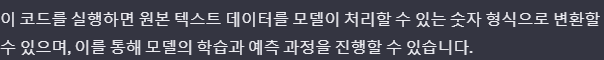

#### 각 문자가 어떤 정수에 매핑되는지 출력 (PPT 18페이지)

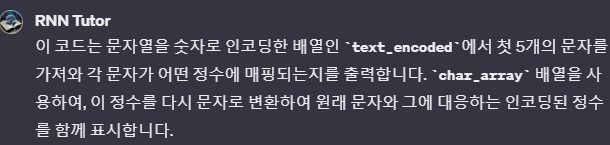

In [ ]:
# text_encoded 배열에서 처음 5개의 인코딩된 문자를 가져옵니다.
for ex in text_encoded[:5]:
    # 각 인코딩된 정수와 해당하는 문자를 출력합니다.
    # 이때 char_array 배열을 인덱싱하여 정수를 문자로 변환합니다.
    print('{} -> {}'.format(ex, char_array[ex]))

48 -> T
36 -> H
33 -> E
1 ->  
41 -> M


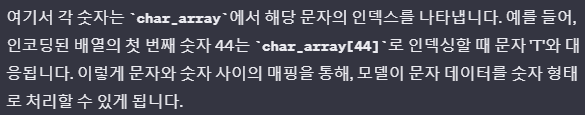

#### 청크 데이터 준비 (PPT 19페이지)

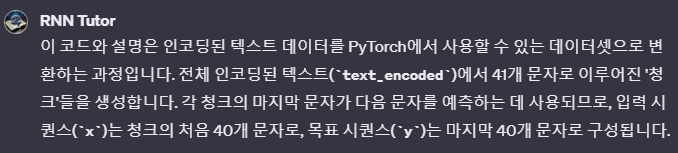

In [ ]:
# PyTorch 및 Dataset 라이브러리를 가져옵니다.
import torch
from torch.utils.data import Dataset

# 시퀀스 길이를 정의합니다. 이 예제에서는 각 시퀀스의 길이를 40으로 설정합니다.
seq_length = 40
# chunk_size는 시퀀스 길이에 1을 더한 값으로 설정합니다.
# 이는 각 청크의 마지막 문자를 다음 문자의 타깃으로 사용하기 위함입니다.
chunk_size = seq_length + 1

# text_encoded에서 chunk_size 길이의 시퀀스를 추출하여 text_chunks 리스트를 생성합니다.
# 각 청크는 연속적인 문자 시퀀스를 나타냅니다.
text_chunks = [text_encoded[i:i+chunk_size]
               for i in range(len(text_encoded)-chunk_size)]

# Dataset 클래스를 상속받아 TextDataset 클래스를 정의합니다.
class TextDataset(Dataset):
    # 생성자에서 text_chunks 리스트를 초기화합니다.
    def __init__(self, text_chunks):
        self.text_chunks = text_chunks

    # 데이터셋의 전체 길이를 반환하는 메소드입니다.
    def __len__(self):
        return len(self.text_chunks)

    # 특정 인덱스(idx)에 위치한 데이터를 반환하는 메소드입니다.
    # 여기서는 입력 시퀀스(text_chunk[:-1])와 타겟 시퀀스(text_chunk[1:])를 반환합니다.
    def __getitem__(self, idx):
        text_chunk = self.text_chunks[idx]
        return text_chunk[:-1].long(), text_chunk[1:].long()

# TextDataset 인스턴스를 생성합니다.
# 이때, text_chunks 리스트를 텐서로 변환하여 인자로 전달합니다.
seq_dataset = TextDataset(torch.tensor(text_chunks))

<ipython-input-5-a5605f8ad245>:34: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  seq_dataset = TextDataset(torch.tensor(text_chunks))


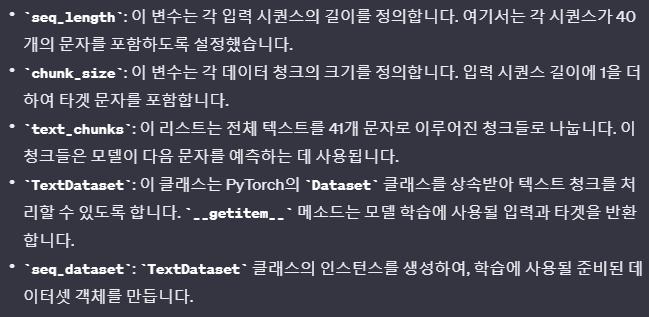

### 변환된 예시 시퀀스

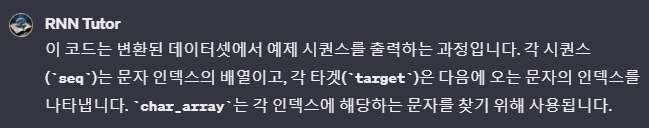

In [ ]:
# TextDataset 인스턴스에서 데이터를 순회하며 처리합니다.
# enumerate 함수를 사용하여 각 데이터에 대한 인덱스(i)와 데이터(시퀀스와 타겟)를 함께 가져옵니다.
for i, (seq, target) in enumerate(seq_dataset):
    # seq를 문자열로 변환하여 출력합니다. 이는 입력 시퀀스를 나타냅니다.
    # char_array를 사용하여 각 인덱스에 해당하는 문자를 가져온 후, 이를 문자열로 합칩니다.
    print(' Input (x): ', repr(''.join(char_array[seq])))

    # target을 문자열로 변환하여 출력합니다. 이는 타겟 시퀀스를 나타냅니다.
    # 마찬가지로 char_array를 사용하여 인덱스를 문자로 변환하고, 문자열로 합칩니다.
    print('Target (y): ', repr(''.join(char_array[target])))

    # 빈 줄을 출력하여 두 출력 사이를 구분합니다.
    print()

    # 첫 두 데이터만 출력하고 반복문을 종료합니다.
    if i == 1:
        break

 Input (x):  'THE MYSTERIOUS ISLAND ***\n\n\n\n\nTHE MYSTER'
Target (y):  'HE MYSTERIOUS ISLAND ***\n\n\n\n\nTHE MYSTERI'

 Input (x):  'HE MYSTERIOUS ISLAND ***\n\n\n\n\nTHE MYSTERI'
Target (y):  'E MYSTERIOUS ISLAND ***\n\n\n\n\nTHE MYSTERIO'



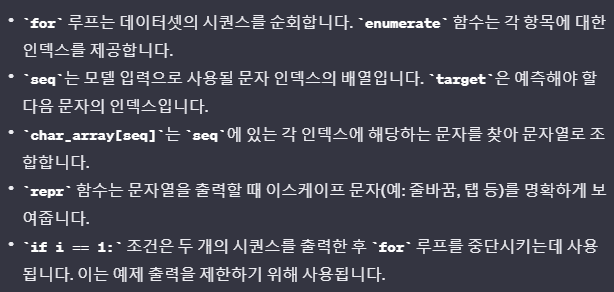

### 미니배치 데이터 준비

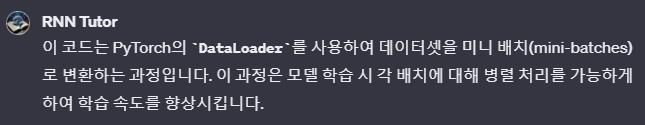

In [ ]:
# PyTorch의 DataLoader 및 기타 필요한 모듈들을 불러옵니다.
from torch.utils.data import DataLoader

# 미니 배치의 크기를 설정합니다. 이 경우 한 배치에 64개의 샘플이 포함됩니다.
batch_size = 64

# 재현 가능한 결과를 위해 torch의 난수 생성기 시드를 설정합니다.
torch.manual_seed(1)

# DataLoader 인스턴스를 생성합니다. 이 DataLoader는 seq_dataset에서 데이터를 불러오는 역할을 합니다.
# 배치 크기는 앞서 정의한 batch_size로 설정하고, 데이터를 무작위로 섞기 위해 shuffle=True로 설정합니다.
# drop_last=True는 마지막 배치가 배치 크기보다 작을 경우 해당 배치를 버리는 옵션입니다.
seq_dl = DataLoader(seq_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

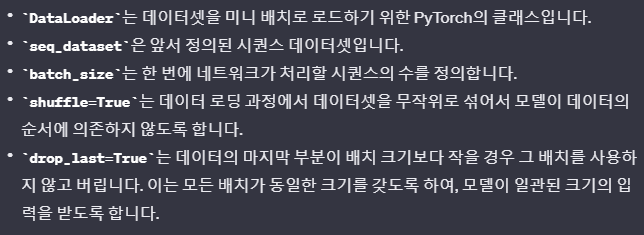

### character-level RNN 모델 구축

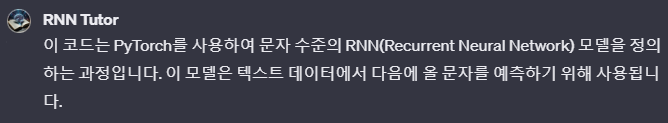

In [ ]:
# 필요한 PyTorch 모듈을 불러옵니다.
import torch.nn as nn

# RNN 클래스를 정의합니다. 이 클래스는 PyTorch의 nn.Module을 상속받습니다.
class RNN(nn.Module):
    # 생성자를 정의합니다. 여기서 vocab_size는 고유 단어의 수, embed_dim은 임베딩 차원의 크기,
    # rnn_hidden_size는 RNN의 은닉층 크기를 나타냅니다.
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size):
        super().__init__()
        # 임베딩 레이어를 정의합니다. 각 단어를 embed_dim 크기의 밀집 벡터로 변환합니다.
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        # RNN 은닉층의 크기를 저장합니다.
        self.rnn_hidden_size = rnn_hidden_size
        # LSTM 레이어를 정의합니다. LSTM은 RNN의 한 종류로, 장기 의존성 문제를 해결하기 위해 사용됩니다.
        self.rnn = nn.LSTM(embed_dim, rnn_hidden_size, batch_first=True)
        # 전결합층(Linear)을 정의합니다. RNN의 출력을 단어 수만큼의 크기로 변환합니다.
        self.fc = nn.Linear(rnn_hidden_size, vocab_size)

    # 순방향 계산을 정의합니다. x는 입력 데이터, hidden과 cell은 LSTM의 상태를 나타냅니다.
    def forward(self, x, hidden, cell):
        # 입력 데이터를 임베딩 레이어를 통해 변환합니다.
        out = self.embedding(x).unsqueeze(1)
        # LSTM 레이어를 통해 데이터를 처리하고 새로운 상태를 반환받습니다.
        out, (hidden, cell) = self.rnn(out, (hidden, cell))
        # 전결합층을 통해 최종 출력을 계산합니다.
        out = self.fc(out).reshape(out.size(0), -1)
        return out, hidden, cell

    # RNN의 초기 은닉 상태와 셀 상태를 0으로 초기화하는 함수를 정의합니다.
    def init_hidden(self, batch_size):
        # 은닉 상태와 셀 상태를 0으로 초기화합니다.
        hidden = torch.zeros(1, batch_size, self.rnn_hidden_size)
        cell = torch.zeros(1, batch_size, self.rnn_hidden_size)
        return hidden, cell

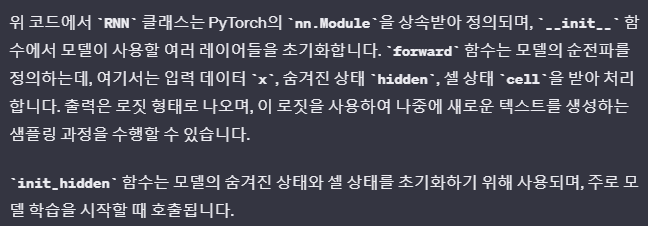

### 모델 파라미터

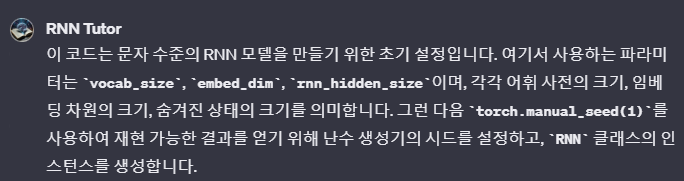

In [ ]:
# PyTorch 모듈을 불러옵니다.
import torch

# 고유 문자 집합의 크기를 저장합니다. 이는 모델의 입력 크기가 됩니다.
vocab_size = len(char_array)  # 고유 문자의 수
# 임베딩 차원의 크기를 지정합니다. 이는 각 문자를 얼마나 큰 차원의 벡터로 표현할지 결정합니다.
embed_dim = 256
# RNN 은닉층의 크기를 지정합니다. 이는 RNN의 내부 상태 벡터의 크기를 결정합니다.
rnn_hidden_size = 512

# PyTorch의 난수 생성기 시드를 설정합니다. 이는 실험의 재현성을 위해 사용됩니다.
torch.manual_seed(1)

# 앞서 정의한 RNN 클래스를 사용하여 모델을 생성합니다. 이때, 고유 문자 수, 임베딩 차원, 은닉층 크기를 인자로 전달합니다.
model = RNN(vocab_size, embed_dim, rnn_hidden_size)

# 생성된 모델의 구조를 출력합니다.
model

RNN(
  (embedding): Embedding(87, 256)
  (rnn): LSTM(256, 512, batch_first=True)
  (fc): Linear(in_features=512, out_features=87, bias=True)
)

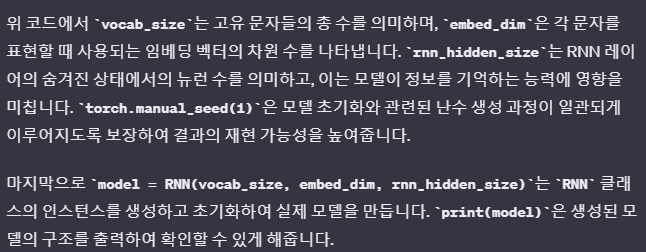

### 손실함수, 옵티마이저 설정

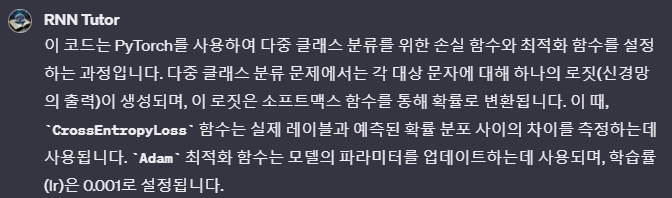

In [ ]:
# PyTorch의 신경망 모듈을 불러옵니다.
import torch.nn as nn

# Cross Entropy 손실 함수를 생성합니다.
# 이 함수는 모델의 예측과 실제 타겟 레이블 간의 차이를 측정하는 데 사용됩니다.
loss_fn = nn.CrossEntropyLoss()

# 모델의 파라미터를 최적화할 Adam 옵티마이저를 생성합니다.
# lr 파라미터는 학습률(learning rate)을 지정하며, 이는 학습 과정에서 파라미터 업데이트의 크기를 결정합니다.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#### 학습

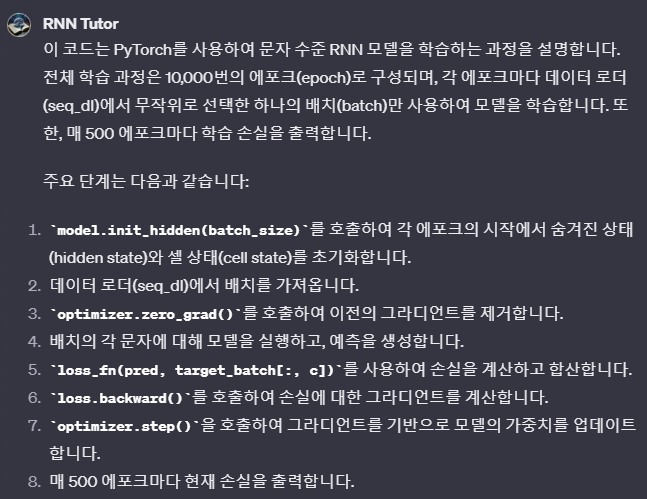

In [ ]:
# # 총 학습할 에포크(epoch) 수를 설정합니다.
# num_epochs = 10000

# # 재현 가능한 결과를 위해 난수 생성기의 시드를 설정합니다.
# torch.manual_seed(1)

# # 에포크 수만큼 학습을 반복합니다.
# for epoch in range(num_epochs):
#     # 모델의 숨겨진 상태와 셀 상태를 초기화합니다.
#     hidden, cell = model.init_hidden(batch_size)

#     # 데이터 로더에서 배치를 하나 가져옵니다.
#     seq_batch, target_batch = next(iter(seq_dl))

#     # 옵티마이저의 그라디언트를 초기화합니다.
#     optimizer.zero_grad()

#     # 손실을 계산하기 위한 초기 값 설정합니다.
#     loss = 0

#     # 시퀀스 길이만큼 반복하여 모델의 예측값을 계산합니다.
#     for c in range(seq_length):
#         # 모델을 통해 예측을 수행하고 숨겨진 상태와 셀 상태를 업데이트합니다.
#         pred, hidden, cell = model(seq_batch[:, c], hidden, cell)

#         # 예측값과 실제 타겟 값 사이의 손실을 계산하고 누적합니다.
#         loss += loss_fn(pred, target_batch[:, c])

#     # 손실에 대한 그라디언트를 계산하고 역전파를 수행합니다.
#     loss.backward()

#     # 옵티마이저를 통해 모델의 파라미터를 업데이트합니다.
#     optimizer.step()

#     # 평균 손실을 계산합니다.
#     loss = loss.item()/seq_length

#     # 특정 에포크마다 손실을 출력합니다.
#     if epoch % 500 == 0:
#         print(f'Epoch {epoch} loss: {loss:.4f}')

### 평가 - 새로운 텍스트 생성

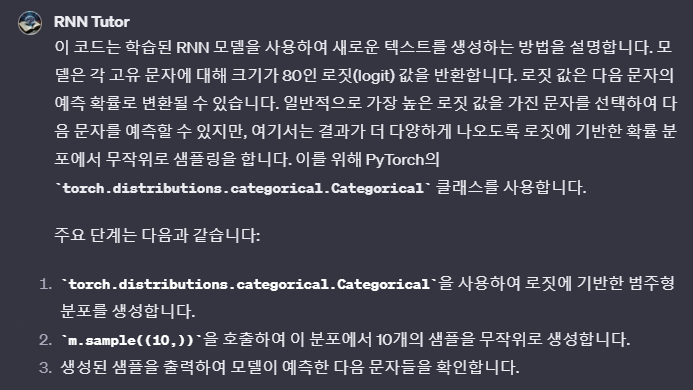

In [ ]:
# PyTorch의 분포(distributions) 모듈에서 Categorical 클래스를 가져옵니다.
from torch.distributions.categorical import Categorical

# 재현 가능한 결과를 위해 난수 생성기의 시드를 설정합니다.
torch.manual_seed(1)

# 로짓 값으로 구성된 텐서를 생성합니다. 이 경우 모든 카테고리의 로짓이 동일합니다.
logits = torch.tensor([[1.0, 1.0, 1.0]])

# 로짓을 소프트맥스 함수를 통해 확률로 변환하고 출력합니다.
print('Probabilities:', nn.functional.softmax(logits, dim=1).numpy()[0])

# Categorical 분포 객체를 생성합니다. 이 분포는 주어진 로짓을 바탕으로 확률을 계산합니다.
m = Categorical(logits=logits)

# 분포에서 10개의 샘플을 추출합니다.
samples = m.sample((10,))

# 추출된 샘플들을 출력합니다.
print(samples.numpy())

Probabilities: [0.33333334 0.33333334 0.33333334]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [2]
 [1]
 [1]]


### 로짓 값에 따른 다른 확률 분포를 가지는 샘플링

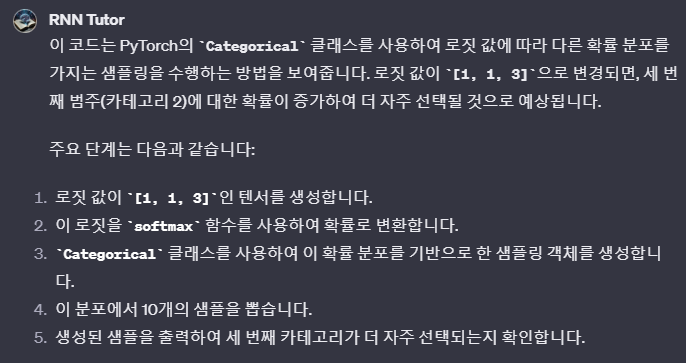

In [ ]:
# Categorical 분포 객체를 생성합니다. 이번에는 세 번째 카테고리에 더 높은 확률을 부여합니다.
from torch.distributions.categorical import Categorical

# 동일한 샘플링 결과를 얻기 위해 난수 시드를 설정합니다.
torch.manual_seed(1)

# 변경된 로짓을 생성합니다.
logits = torch.tensor([[1.0, 1.0, 3.0]])

# 로짓을 확률로 변환합니다.
print('Probabilities:', nn.functional.softmax(logits, dim=1).numpy()[0])

# Categorical 객체를 생성하여 분포에서 샘플을 추출합니다.
m = Categorical(logits=logits)

# 분포에서 10개의 샘플을 추출합니다.
samples = m.sample((10,))

# 추출된 샘플들을 출력합니다.
print(samples.numpy())

Probabilities: [0.10650698 0.10650698 0.78698605]
[[0]
 [2]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]]


### 주어진 시작 문자열을 기반으로 새로운 텍스트 생성

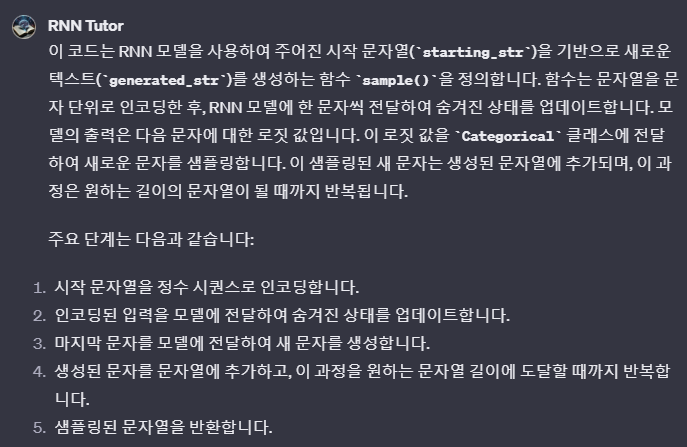

In [ ]:
# 모델을 사용하여 새로운 텍스트를 생성하는 함수입니다.
def sample(model, starting_str, len_generated_text=500, scale_factor=1.0):
    # 시작 문자열을 정수 시퀀스로 인코딩합니다.
    encoded_input = torch.tensor([char2int[s] for s in starting_str])
    encoded_input = torch.reshape(encoded_input, (1, -1))
    generated_str = starting_str

    # 모델을 평가 모드로 설정하고 숨겨진 상태를 초기화합니다.
    model.eval()
    hidden, cell = model.init_hidden(1)

    # 시작 문자열의 각 문자에 대해 숨겨진 상태를 업데이트합니다.
    for c in range(len(starting_str)-1):
        _, hidden, cell = model(encoded_input[:, c].view(1), hidden, cell)

    # 마지막 문자로부터 새로운 문자를 생성합니다.
    last_char = encoded_input[:, -1]
    for i in range(len_generated_text):
        logits, hidden, cell = model(last_char.view(1), hidden, cell)
        logits = torch.squeeze(logits, 0)
        scaled_logits = logits * scale_factor
        m = Categorical(logits=scaled_logits)
        last_char = m.sample()
        generated_str += str(char_array[last_char])

    return generated_str

### "The island"라는 시작 문자열을 기반으로 새로운 텍스트 생성

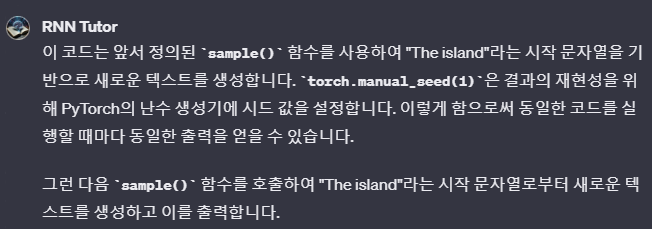

In [ ]:
# PyTorch의 난수 생성기에 시드 값을 설정합니다.
torch.manual_seed(1)

# 'The island'라는 시작 문자열을 사용하여 새로운 텍스트를 생성하고 출력합니다.
print(sample(model, starting_str='The island'))

The island nout of undion he o the fir megeper.
Heurds at a wanat on himcrate, 3obunâd. These oir.

But that wavers Asss plefte,â so moning hat themen dvile swact, ftrans of had his!â readin, chuncise the inuabs.

Cyre fromber, ref raps andpy say noneer, âLis was hand an the green futring the reycted. But the arpiny!â

âAt have then a sollinaty, the would repantignHs acceond âdose.
There cerermed hound not the his adrut and shatem,
theas rerapuse with

as. The
saters, The latat, ap asreg ar 


### 로짓을 조절

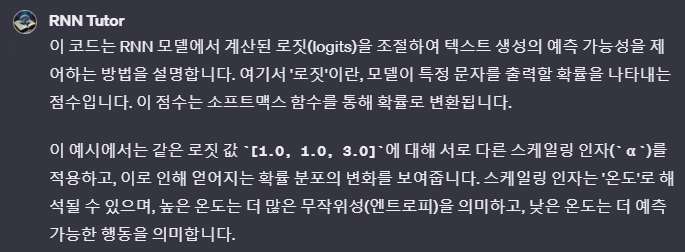

In [ ]:
# 로짓 값 정의
logits = torch.tensor([[1.0, 1.0, 3.0]])

# 스케일링 전의 확률 분포 계산 및 출력
print('Probabilities before scaling: ', nn.functional.softmax(logits, dim=1).numpy()[0])

# 스케일링 인자 0.5를 적용한 후의 확률 분포 계산 및 출력
print('Probabilities after scaling with 0.5:', nn.functional.softmax(0.5*logits, dim=1).numpy()[0])

# 스케일링 인자 0.1을 적용한 후의 확률 분포 계산 및 출력
print('Probabilities after scaling with 0.1:', nn.functional.softmax(0.1*logits, dim=1).numpy()[0])

Probabilities before scaling:  [0.10650698 0.10650698 0.78698605]
Probabilities after scaling with 0.5: [0.21194156 0.21194156 0.57611686]
Probabilities after scaling with 0.1: [0.3104238  0.3104238  0.37915248]


### 스케일링 인자 2.0 적용

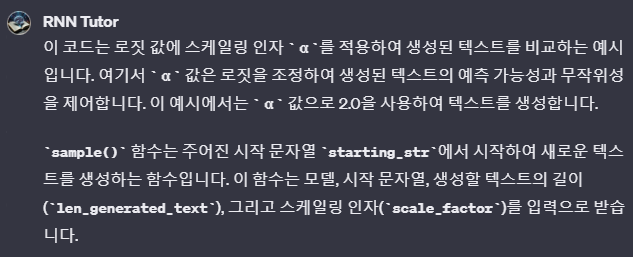

In [ ]:
# torch의 manual_seed 함수를 사용하여 난수 생성기의 상태를 초기화
torch.manual_seed(1)

# sample 함수를 사용하여 "The island"로 시작하는 텍스트 생성
# 스케일링 인자로 2.0을 사용
print(sample(model, starting_str='The island', scale_factor=2.0))

The island nout the wither woo the sill the engineer a late the stonting the colling the munded the contter with the resest the corting the seaving the sime could the settaris of the conlent was said the serted in a sanding the colled the les and whe he sailor as a said his was of the coringer on the reacted of the had the mase be suthing the beat of the surter at the have congine were and the recores the recers of the bead on the was the saile of the recaplied in that munder the being and the prasing the


### 스케일링 인자 0.5 적용

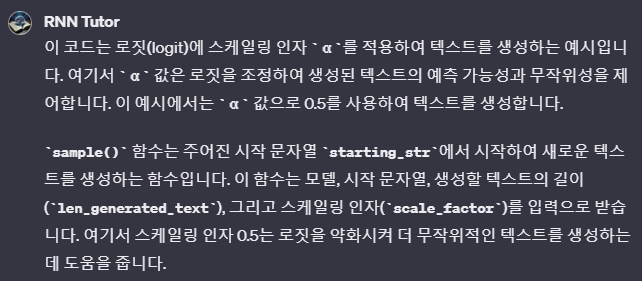

In [ ]:
# torch의 manual_seed 함수를 사용하여 난수 생성기의 상태를 초기화
torch.manual_seed(1)

# sample 함수를 사용하여 "The island"로 시작하는 텍스트 생성
# 스케일링 인자로 0.5를 사용
print(sample(model, starting_str='The island', scale_factor=0.5))

The island

kut!â
Wuwwion hvoo thap ir meg2pe-EHau!
lvMuvganat An8%Slcratece3-bunâd.-
Their ir.

Btt dowA;n-Asssa
gist!lefââ,â I Ko Lon7vavizt. Whusidnâs swact, ftranuwno-Awnexur!â
âGten7, chughtser pIiinuabs.
HivRr/!âby reruf rapd NempMh, munsneesfE.s
Sesqaig*, Isave?âjPâ%rizuer onb coorcy teeve7, -, hhar t y!
Grâ?imvutey, wets
beaus llieatu, tkanks, ad hountcrnHstece ofwaâks8,--rW-Dars cejcrmed h qou'nol-t?zantâdrut rouks a=Lmin1uzaugrerg use wided
an. mIils.âc
Bvi9y
tlyaw, He;r regl,G 
